In [1]:
from datetime import datetime, timedelta
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
fund = [
    "NVDA",
    "MSFT",
    "AAPL",
    "AVGO",
    "CDNS",
    "META",
    "AMD",
    "ASML.AS",
    "AMZN",
    "MA"
]
stock_weights = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
start_day = "2010-01-01"
end_day = "2020-01-01"

In [3]:
data = yf.download(" ".join(fund), start=start_day, end=end_day)

[*********************100%%**********************]  10 of 10 completed


In [4]:
close_prices = data['Close']

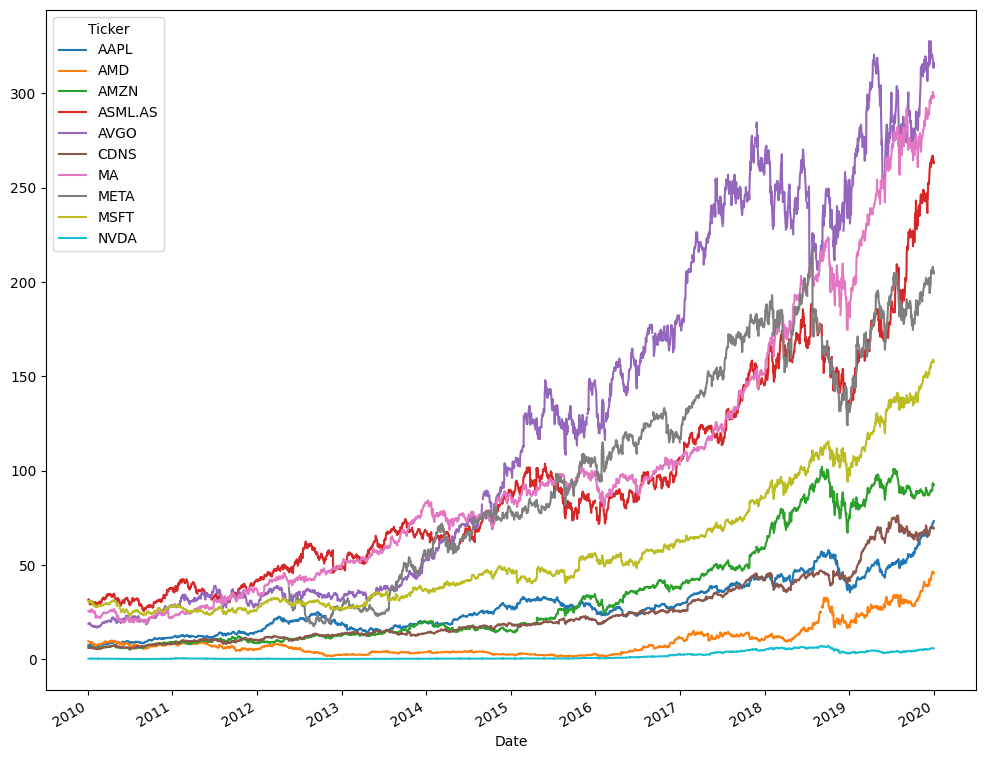

In [5]:
# Plot the close prices
close_prices.plot(figsize=(12, 10))

# Display the plot
plt.show()

In [6]:
percentage_change = close_prices.pct_change(fill_method=None)
percentage_change_stats = percentage_change.describe()
display(percentage_change_stats)

Ticker,AAPL,AMD,AMZN,ASML.AS,AVGO,CDNS,MA,META,MSFT,NVDA
count,2450.000000,2450.000000,2450.000000,2531.000000,2450.000000,2450.000000,2450.000000,1867.000000,2450.000000,2450.000000
mean,0.000960,0.001253,0.001166,0.000975,0.001395,0.001138,0.001080,0.001151,0.000734,0.001404
std,0.016270,0.036190,0.019600,0.017992,0.021446,0.016857,0.016024,0.022824,0.014385,0.025604
min,-0.123558,-0.242291,-0.126568,-0.207988,-0.137447,-0.103377,-0.105898,-0.189609,-0.113995,-0.187559
25%,-0.006927,-0.016535,-0.008220,-0.008591,-0.010000,-0.007150,-0.006647,-0.009070,-0.006722,-0.011035
50%,0.000889,0.000000,0.000938,0.000829,0.001523,0.001176,0.001584,0.000981,0.000538,0.001075
75%,0.009728,0.018134,0.011139,0.010994,0.012309,0.009663,0.008535,0.011761,0.008221,0.013323
max,0.088741,0.522901,0.157457,0.139550,0.147054,0.153657,0.133941,0.296115,0.104522,0.298067


<Axes: xlabel='Ticker'>

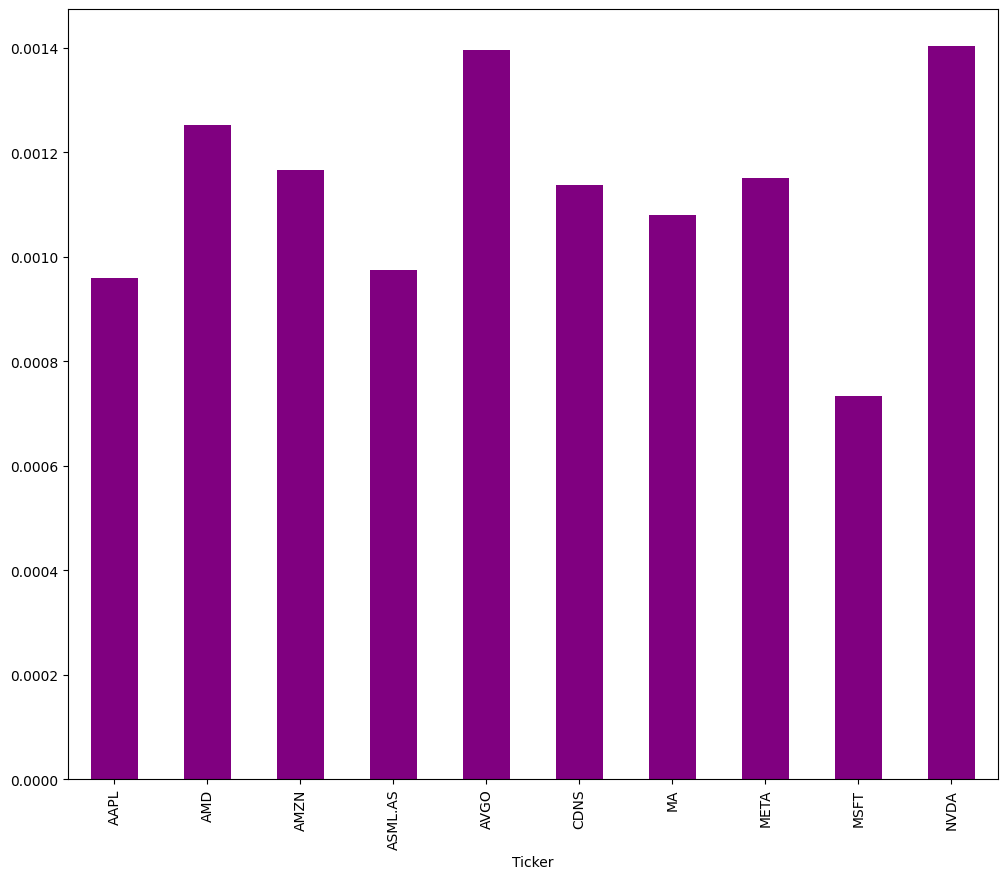

In [7]:
# Extract the mean values
percentage_change_mean = percentage_change_stats.loc['mean']

# Plot the mean values
percentage_change_mean.plot(kind='bar', figsize=(12, 10), color='purple')

Ticker,AAPL,AMD,AMZN,ASML.AS,AVGO,CDNS,MA,META,MSFT,NVDA
Date,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,1.001729,1.001031,1.005900,1.001855,1.007423,0.990196,0.997041,NaN,1.000323,1.014603
2010-01-06,0.985795,0.986598,0.987677,1.012572,1.015376,1.001634,0.995016,NaN,0.994184,1.021093
2010-01-07,0.983973,0.976289,0.970874,0.994023,1.009014,1.021242,0.988514,NaN,0.983845,1.001082
2010-01-08,0.990514,0.972165,0.997162,0.960635,1.016437,1.035948,0.988865,NaN,0.990630,1.003245
...,...,...,...,...,...,...,...,...,...,...
2019-12-24,7.342969,4.523469,10.548946,7.898496,17.624477,11.525217,10.248395,5.306934,4.672428,14.260231
2019-12-26,7.488656,4.532217,11.018021,NaN,17.485902,11.591406,10.307650,5.376013,4.710726,14.294296
2019-12-27,7.485815,4.488479,11.024094,NaN,17.406165,11.631120,10.360703,5.384034,4.719336,14.155649


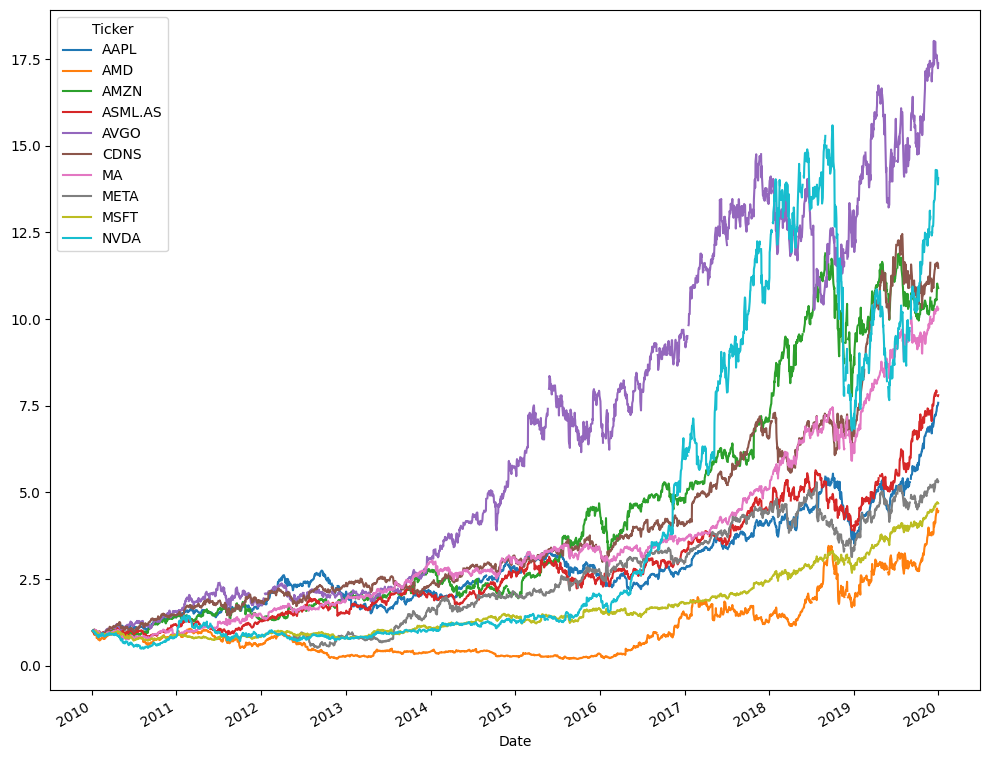

In [8]:
# Calculate the cumulative_returns
cumulative_returns = (percentage_change +1).cumprod()
display(cumulative_returns)

# Plot the cumulative_returns
cumulative_returns.plot(figsize=(12, 10))


# Display the plot
plt.show()

In [9]:
initial_investment_amount = 100 # dollars
number_of_stocks_in_fund = len(fund)

start = datetime.strptime(start_day, "%Y-%m-%d")
end = datetime.strptime(end_day, "%Y-%m-%d")

investment_period_in_years = round((end - start).days / 365.25)
last_day_of_investment = (end + timedelta(days=-1)).strftime("%Y-%m-%d")
actual_returns = cumulative_returns.loc[last_day_of_investment]
equal_share = initial_investment_amount / number_of_stocks_in_fund

today_value = 0
for v in actual_returns.values:
    today_value += equal_share*v

today_value = round(today_value)

print(f"An investment of {initial_investment_amount} $ at {start_day} equally distributed across these {number_of_stocks_in_fund} stocks is worth on {end_day}: ", 
      today_value)

print(f"An initial investment of {initial_investment_amount} yields a return of {(today_value/initial_investment_amount)*100}% in 10 years period")

An investment of 100 $ at 2010-01-01 equally distributed across these 10 stocks is worth on 2020-01-01:  939
An initial investment of 100 yields a return of 939.0% in 10 years period


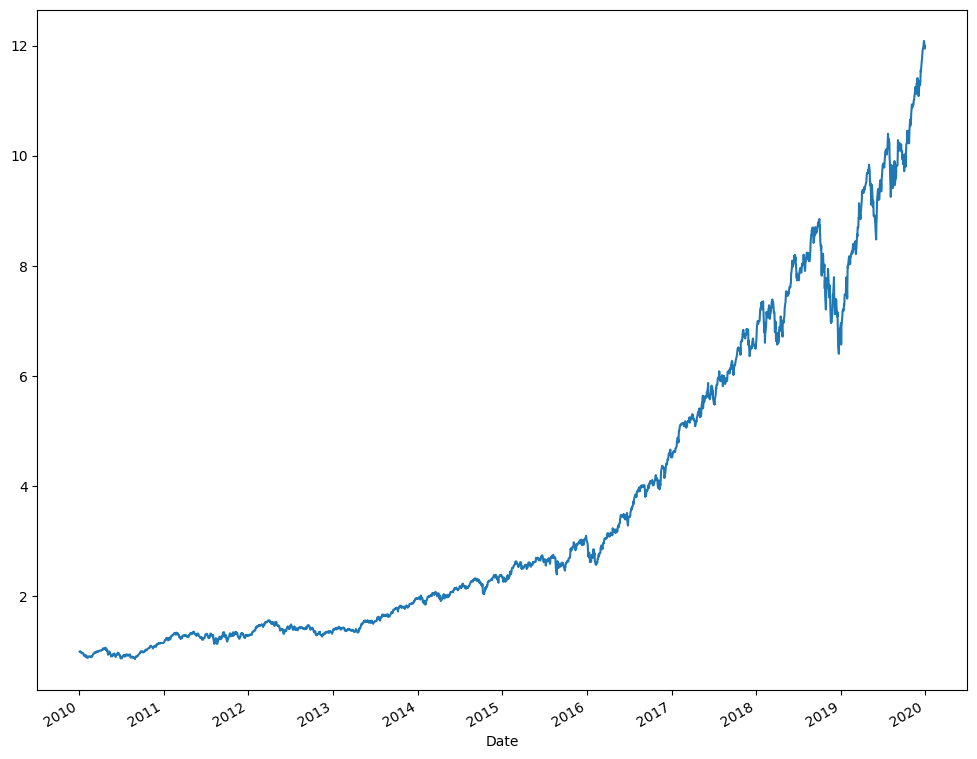

In [10]:
# Total cumulative returns for our portfolio
total_returns = (percentage_change * stock_weights).sum(axis = 1)
total_cumulative_returns = (total_returns + 1).cumprod() 

total_cumulative_returns.plot(figsize=(12, 10))
plt.show()

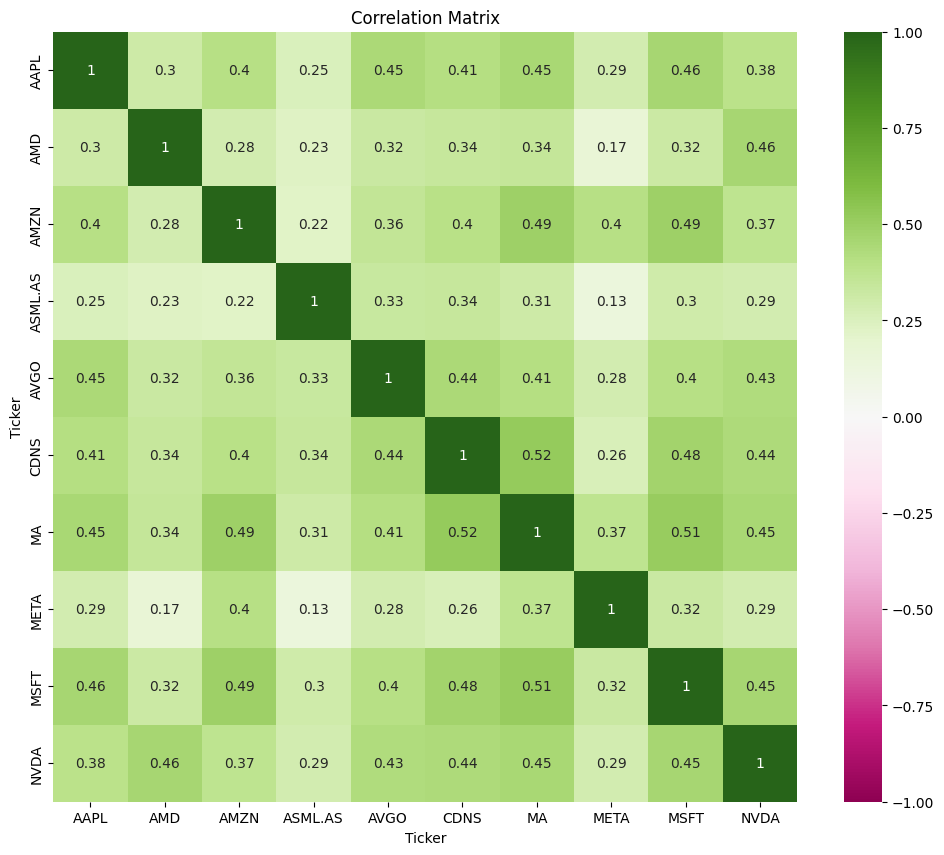

In [11]:
# Invastigating correlation between stocks
correlation = percentage_change.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='PiYG', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

The maximum sharpe ratio:  1.4055293691262603
The stocks:  ['NVDA', 'MSFT', 'AAPL', 'AVGO', 'CDNS', 'META', 'AMD', 'ASML.AS', 'AMZN', 'MA']
The optimal stock weights that gives the maximum sharpe ratio:  [0.11238201 0.00122511 0.11626074 0.19373514 0.14003999 0.1441646
 0.13970089 0.12487391 0.01264919 0.01496842]


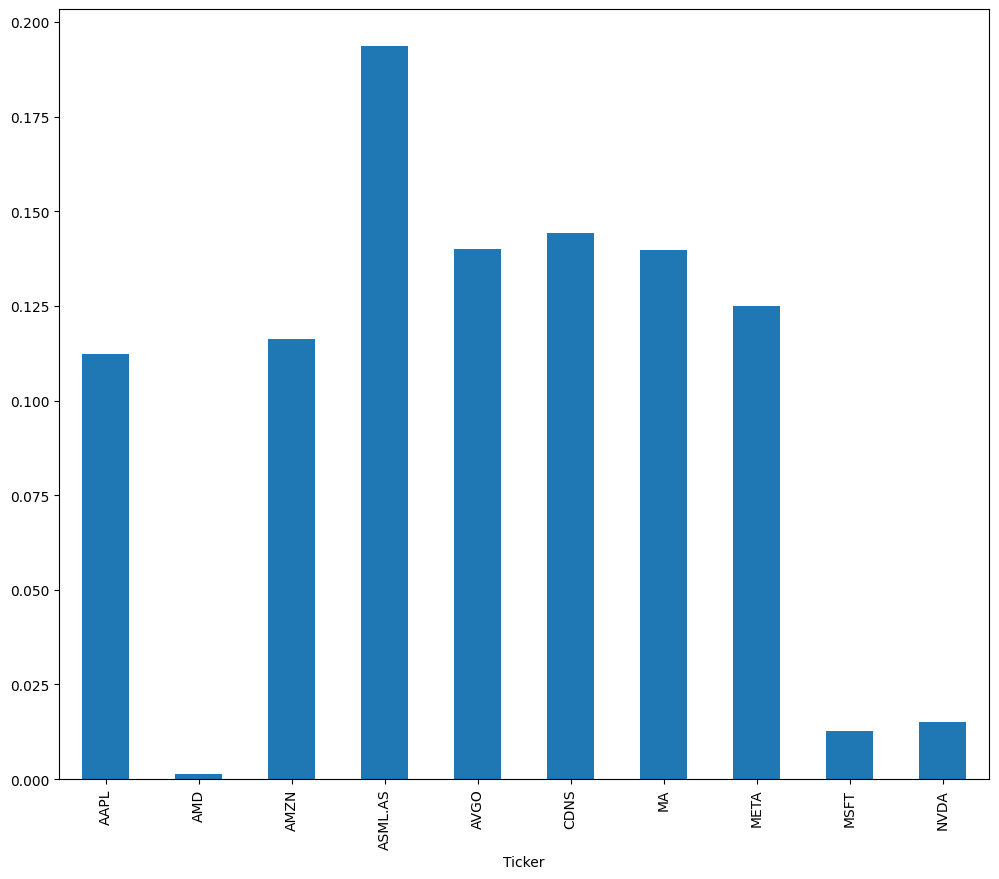

In [12]:
# Optimizing the stocks weights of this portfolio
p_weights, p_returns, p_risk, p_sharpe = [], [], [], []

count = 500000
for k in range(0, count):
   wts = np.random.uniform(size = len(percentage_change.columns))
   wts = wts/np.sum(wts)
   p_weights.append(wts)

   #returns
   mean_ret = (percentage_change.mean() * wts).sum()*252
   p_returns.append(mean_ret)

   #volatility
   ret = (percentage_change * wts).sum(axis = 1)
   annual_std = np.std(ret) * np.sqrt(252)
   p_risk.append(annual_std)
    
   #Sharpe ratio
   sharpe = (np.mean(ret) / np.std(ret))*np.sqrt(252)
   p_sharpe.append(sharpe)


max_ind = np.argmax(p_sharpe)

# Max Sharpe ratio
print("The maximum sharpe ratio: ", p_sharpe[max_ind])

# Stocks
print("The stocks: ", fund)

# Stock Weights
print("The optimal stock weights that gives the maximum sharpe ratio: ", p_weights[max_ind])

s = pd.Series(p_weights[max_ind], index=percentage_change.columns)

s.plot(kind='bar', figsize=(12, 10))

plt.show()